In [14]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [15]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
2022_Feb_week4_new_ephemeris_sin_fit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit.jpg
2022_Feb_week4_new_ephemeris_sin_fit.out
2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg
2022_Feb_week4_new_ephemeris_sin_fit_weighted_data.ipynb
interporate.out
interporate_weighted_mean.out


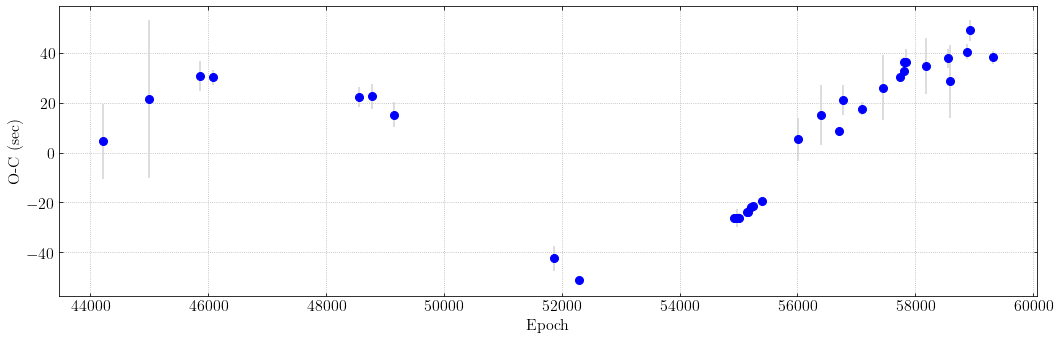

In [16]:
#Plot O-C vs BJD
Input  = '2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out'
Data   = np.genfromtxt(Input)


Epoch = Data[:,0]
OC_s = Data[:,1]
OC_s_err = Data[:,2]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time)
#x2 = max(BJD_time)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(Epoch, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()

In [17]:
x = Epoch
y = OC_s
dy = OC_s_err

len_x = len(x)
print(len_x)

34


In [18]:
def sin_fit(x, a, b, c, d):
    return a*np.sin(b*x - np.radians(c)) + d

In [19]:
guess = [43.9455, 0.0000324289, -145.235, -5.46613]
params, params_covariance = optimization.curve_fit(sin_fit, x, y, guess)

a = params[0]
b = params[1]
c = params[2]
d = params[3]


da = params_covariance[0,0]
db = params_covariance[1,1]
dc = params_covariance[2,2]
dd = params_covariance[3,3]

output_fit = sin_fit(x, a, b, c, d)


print("The parameters of egress part")
print("a =", a, "+/-", da**0.5)
print("b =", b, "+/-", db**0.5)
print("c =", c, "+/-", dc**0.5)
print("d =", d, "+/-", dd**0.5)

The parameters of egress part
a = 42.56828153546464 +/- 3.7765907137230754
b = 3.255249381277433e-05 +/- 1.05095566005842e-06
c = -145.40688358296845 +/- 5.649917120191178
d = -5.004414968773284 +/- 3.266654398124648

The parameters of egress part
a = 44.911208994735524 +/- 1.239301843973438
b = 0.0005255200310110252 +/- 5.81532641735151e-06
c = 1322.5605231927118 +/- 17.5602967844379
d = -5.185674821833542 +/- 1.1366475288255158


In [38]:
x_min, x_max = np.amin(x), np.amax(x)
#x_line = np.linspace(x_min, x_max, len_x)
x_line = np.linspace(x_min, x_max)
y_line = sin_fit(x_line, *params) #### For all interporation 
s = a*np.sin(b*x - np.radians(c)) + d #just only our data point
Res = y - s
print(y)
print(s)

#Reduced_chisqrt
m = 4
dof = len_x - m
Chi_sqr = ((y - s)**2)/(dy**2)/dof
print(Chi_sqr)
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[  4.53184  21.57293  30.67102  30.08092  22.18957  22.53472  15.16077
 -42.46564 -51.10344 -26.34631 -26.13771 -26.29312 -26.06489 -23.6446
 -24.01203 -21.67907 -21.50495 -19.54895   5.3644   14.99663   8.4502
  20.93389  17.56752  25.98046  30.41803  32.61482  36.32651  36.13247
  34.82746  37.74514  28.52137  40.42844  48.9428   38.1972 ]
[  1.64256073  18.74374845  32.9132236   35.55793587  23.92112971
  19.9154218   12.24523665 -43.79250623 -47.83444018 -26.90555833
 -26.45925056 -25.84615777 -25.24376516 -22.30872806 -21.7842713
 -20.71157731 -19.88907313 -16.63785207  -2.26250557   7.00324721
  13.82479467  15.10191176  21.68419819  27.86183303  32.15488976
  32.96066498  32.96066498  33.39603242  36.87318111  39.1381713
  39.25361869  39.7241364   39.69951308  38.48797085]
[1.23678879e-03 2.64842303e-04 4.45691609e-03 1.11135942e-01
 6.24623770e-03 9.14869195e-03 1.13350944e-02 2.34770432e-03
 2.92727161e-01 8.93552345e-03 2.66801622e-03 5.18336383e-04
 8.32724416e-03 1.5067420

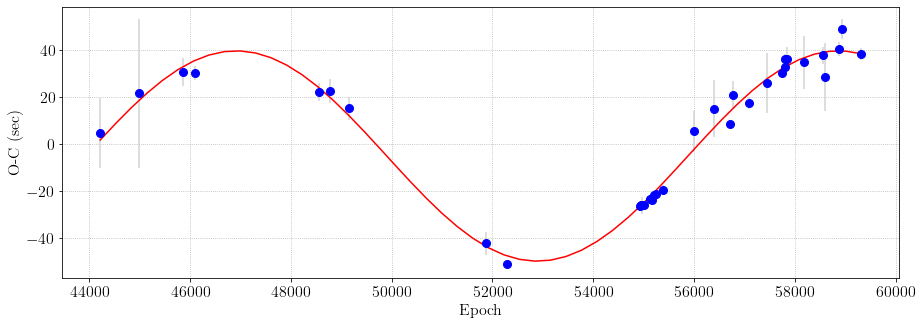

In [39]:
#Plotgraph
fig=plt.figure(figsize=(15, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

#### Interporate output

In [40]:
N = 100000
x_range = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1
#step

interporate = []
for i in range(25000, N):
    x_range[i] = i*step
    y_range[i] = sin_fit(x_range[i], a, b, c, d)
    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.2f %0.2f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_weighted_mean.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

25000 17.139826756556104
25001 17.119344646066466
25002 17.098856375570755
25003 17.078361950727093
25004 17.05786137719553
25005 17.037354660637803
25006 17.01684180671714
25007 16.996322821098666
25008 16.975797709449218
25009 16.955266477437092
25010 16.934729130732563
25011 16.91418567500733
25012 16.893636115934967
25013 16.87308045919074
25014 16.8525187104514
25015 16.83195087539557
25016 16.81137695970358
25017 16.790796969057205
25018 16.770210909140182
25019 16.749618785637665
25020 16.729020604236673
25021 16.708416370625898
25022 16.687806090495492
25023 16.667189769537508
25024 16.646567413445645
25025 16.62593902791506
25026 16.60530461864287
25027 16.584664191327562
25028 16.564017751669503
25029 16.543365305370713
25030 16.52270685813466
25031 16.50204241566677
25032 16.481371983673817
25033 16.460695567864455
25034 16.440013173948977
25035 16.419324807639143
25036 16.39863047464854
25037 16.37793018069243
25038 16.357223931487503
25039 16.336511732752356
25040 16.31579

26276 -11.910737262199515
26277 -11.934071967829237
26278 -11.957404809745288
26279 -11.980735781503967
26280 -12.00406487666185
26281 -12.027392088776033
26282 -12.050717411404364
26283 -12.074040838104985
26284 -12.097362362436549
26285 -12.120681977958483
26286 -12.143999678230418
26287 -12.167315456812837
26288 -12.190629307266509
26289 -12.213941223152737
26290 -12.237251198033599
26291 -12.260559225471471
26292 -12.283865299029264
26293 -12.307169412270667
26294 -12.330471558759598
26295 -12.353771732060828
26296 -12.377069925739441
26297 -12.400366133361064
26298 -12.42366034849211
26299 -12.446952564699309
26300 -12.470242775549941
26301 -12.493530974612074
26302 -12.516817155454017
26303 -12.540101311644957
26304 -12.563383436754396
26305 -12.586663524352401
26306 -12.609941568009841
26307 -12.633217561297826
26308 -12.656491497788355
26309 -12.679763371053756
26310 -12.703033174666928
26311 -12.726300902201572
26312 -12.749566547231737
26313 -12.772830103332037
26314 -12.7960

27526 -37.62766116046584
27527 -37.64397772988216
27528 -37.660285335246826
27529 -37.67658397205625
27530 -37.692873635809114
27531 -37.70915432200678
27532 -37.725426026152945
27533 -37.74168874375378
27534 -37.75794247031808
27535 -37.77418720135699
27536 -37.79042293238413
27537 -37.80664965891577
27538 -37.82286737647042
27539 -37.83907608056935
27540 -37.855275766736106
27541 -37.87146643049677
27542 -37.88764806738003
27543 -37.90382067291693
27544 -37.91998424264101
27545 -37.936138772088476
27546 -37.95228425679779
27547 -37.96842069231015
27548 -37.98454807416906
27549 -38.00066639792058
27550 -38.01677565911337
27551 -38.03287585329848
27552 -38.048966976029426
27553 -38.065049022862425
27554 -38.081121989355964
27555 -38.09718587107126
27556 -38.11324066357187
27557 -38.12928636242388
27558 -38.14532296319602
27559 -38.161350461459406
27560 -38.17736885278764
27561 -38.193378132757005
27562 -38.20937829694609
27563 -38.225369340936226
27564 -38.241351260311085
27565 -38.257

28775 -49.83900178195315
28776 -49.84152123498411
28777 -49.84402835535206
28778 -49.84652314236462
28779 -49.849005595332784
28780 -49.85147571357097
28781 -49.85393349639701
28782 -49.85637894313214
28783 -49.85881205310099
28784 -49.86123282563161
28785 -49.86364126005543
28786 -49.86603735570735
28787 -49.868421111925606
28788 -49.87079252805187
28789 -49.87315160343125
28790 -49.87549833741223
28791 -49.877832729346686
28792 -49.880154778589954
28793 -49.88246448450073
28794 -49.884761846441165
28795 -49.88704686377677
28796 -49.88931953587649
28797 -49.89157986211269
28798 -49.89382784186113
28799 -49.89606347450098
28800 -49.89828675941482
28801 -49.90049769598864
28802 -49.90269628361186
28803 -49.90488252167728
28804 -49.907056409581116
28805 -49.90921794672302
28806 -49.911367132506015
28807 -49.913503966336584
28808 -49.915628447624584
28809 -49.917740575783284
28810 -49.91984035022939
28811 -49.921927770383
28812 -49.924002835667615
28813 -49.926065545510184
28814 -49.92811

30025 -43.480977229266166
30026 -43.46864195494521
30027 -43.45629610796764
30028 -43.44393969174291
30029 -43.43157270968362
30030 -43.41919516520507
30031 -43.40680706172563
30032 -43.394408402666585
30033 -43.381999191452
30034 -43.36957943150899
30035 -43.35714912626757
30036 -43.34470827916056
30037 -43.33225689362384
30038 -43.319794973096045
30039 -43.30732252101885
30040 -43.29483954083681
30041 -43.2823460359973
30042 -43.26984200995071
30043 -43.257327466150315
30044 -43.24480240805221
30045 -43.232266839115525
30046 -43.219720762802154
30047 -43.207164182577
30048 -43.19459710190787
30049 -43.18201952426535
30050 -43.169431453123046
30051 -43.15683289195745
30052 -43.14422384424787
30053 -43.13160431347663
30054 -43.11897430312879
30055 -43.10633381669245
30056 -43.09368285765858
30057 -43.081021429520945
30058 -43.0683495357763
30059 -43.0556671799243
30060 -43.04297436546736
30061 -43.03027109591097
30062 -43.01755737476331
30063 -43.00483320553558
30064 -42.9920985917419


31275 -21.183610764536038
31276 -21.161554973657196
31277 -21.13949477069882
31278 -21.117430161753305
31279 -21.095361152914258
31280 -21.073287750276656
31281 -21.051209959936244
31282 -21.02912778799042
31283 -21.007041240537646
31284 -20.984950323677594
31285 -20.96285504351114
31286 -20.940755406140518
31287 -20.91865141766871
31288 -20.896543084200356
31289 -20.874430411841146
31290 -20.85231340669796
31291 -20.83019207487903
31292 -20.80806642249334
31293 -20.7859364556515
31294 -20.763802180465177
31295 -20.741663603047225
31296 -20.71952072951183
31297 -20.69737356597392
31298 -20.675222118550053
31299 -20.653066393357825
31300 -20.63090639651601
31301 -20.608742134144716
31302 -20.586573612364774
31303 -20.564400837298642
31304 -20.542223815069807
31305 -20.520042551802927
31306 -20.497857053623825
31307 -20.475667326659654
31308 -20.45347337703827
31309 -20.431275210889172
31310 -20.409072834342844
31311 -20.386866253530947
31312 -20.36465547458645
31313 -20.342440503643033


32775 13.294034442356216
32776 13.315543043058122
32777 13.337046534254847
32778 13.358544910007597
32779 13.380038164379142
32780 13.401526291433653
32781 13.423009285236736
32782 13.444487139855253
32783 13.465959849357928
32784 13.487427407814478
32785 13.508889809296166
32786 13.530347047875702
32787 13.551799117627068
32788 13.573246012626102
32789 13.594687726949646
32790 13.616124254676114
32791 13.63755558988535
32792 13.658981726658494
32793 13.68040265907855
32794 13.701818381229524
32795 13.723228887197012
32796 13.744634171068041
32797 13.766034226931092
32798 13.787429048875937
32799 13.80881863099423
32800 13.830202967378634
32801 13.851582052123417
32802 13.872955879324282
32803 13.894324443078245
32804 13.915687737484225
32805 13.937045756642133
32806 13.958398494653506
32807 13.979745945621326
32808 14.0010881036499
32809 14.022424962845422
32810 14.043756517315119
32811 14.065082761167835
32812 14.08640368851386
32813 14.10771929346498
32814 14.129029570134284
32815 1

34274 36.86280650768227
34275 36.871092299889604
34276 36.879366477225034
34277 36.88762903740346
34278 36.89587997814295
34279 36.90411929716494
34280 36.91234699219392
34281 36.92056306095762
34282 36.92876750118702
34283 36.93696031061621
34284 36.94514148698269
34285 36.95331102802702
34286 36.96146893149297
34287 36.96961519512759
34288 36.977749816681104
34289 36.98587279390691
34290 36.99398412456178
34291 37.00208380640555
34292 37.01017183720131
34293 37.0182482147154
34294 37.02631293671728
34295 37.03436600097982
34296 37.04240740527895
34297 37.05043714739384
34298 37.05845522510694
34299 37.06646163620381
34300 37.07445637847342
34301 37.0824394497078
34302 37.09041084770226
34303 37.09837057025532
34304 37.10631861516869
34305 37.11425498024744
34306 37.122179663299725
34307 37.13009266213699
34308 37.137993974573874
34309 37.14588359842827
34310 37.15376153152123
34311 37.16162777167722
34312 37.16948231672374
34313 37.177325164491585
34314 37.1851563128148
34315 37.1929

35774 35.650042776466165
35775 35.64021313374054
35776 35.6303722160765
35777 35.62052002619182
35778 35.61065656680741
35779 35.60078184064731
35780 35.590895850438535
35781 35.580998598911364
35782 35.57109008879913
35783 35.56117032283829
35784 35.551239303768384
35785 35.54129703433216
35786 35.53134351727524
35787 35.52137875534656
35788 35.51140275129812
35789 35.501415507885
35790 35.49141702786545
35791 35.481407314000634
35792 35.47138636905502
35793 35.46135419579609
35794 35.451310796994456
35795 35.44125617542388
35796 35.431190333861025
35797 35.42111327508585
35798 35.41102500188136
35799 35.40092551703364
35800 35.39081482333188
35801 35.380692923568425
35802 35.37055982053852
35803 35.36041551704071
35804 35.35026001587656
35805 35.340093319850716
35806 35.32991543177101
35807 35.31972635444814
35808 35.30952609069612
35809 35.29931464333195
35810 35.28909201517573
35811 35.27885820905075
35812 35.268613227783156
35813 35.258357074202365
35814 35.248089751140846
35815 3

37274 10.349599943252548
37275 10.327453056334507
37276 10.305301885135973
37277 10.283146435774169
37278 10.26098671436794
37279 10.238822727037164
37280 10.216654479902903
37281 10.194481979087534
37282 10.17230523071417
37283 10.150124240907543
37284 10.127939015793402
37285 10.105749561498673
37286 10.083555884151593
37287 10.06135798988112
37288 10.039155884817827
37289 10.016949575093296
37290 9.994739066840273
37291 9.972524366192662
37292 9.950305479285678
37293 9.928082412255238
37294 9.905855171238864
37295 9.883623762375086
37296 9.861388191803576
37297 9.839148465665314
37298 9.816904590101974
37299 9.794656571256823
37300 9.77240441527413
37301 9.750148128299296
37302 9.727887716479025
37303 9.705623185960697
37304 9.683354542893289
37305 9.661081793426764
37306 9.638804943712211
37307 9.61652399990186
37308 9.59423896814922
37309 9.571949854608473
37310 9.549656665435384
37311 9.52735940678669
37312 9.505058084820257
37313 9.48275270569522
37314 9.460443275571382
37315 9.

38774 -24.114602836188382
38775 -24.13600322955734
38776 -24.157398389389527
38777 -24.178788309776074
38778 -24.20017298480999
38779 -24.22155240858529
38780 -24.242926575197593
38781 -24.264295478743968
38782 -24.285659113322936
38783 -24.307017473034335
38784 -24.328370551979887
38785 -24.349718344262335
38786 -24.371060843986037
38787 -24.392398045256805
38788 -24.413729942181774
38789 -24.43505652886997
38790 -24.456377799431458
38791 -24.477693747977924
38792 -24.4990043686225
38793 -24.52030965547967
38794 -24.541609602665815
38795 -24.562904204298356
38796 -24.58419345449633
38797 -24.60547734738026
38798 -24.626755877072007
38799 -24.64802903769533
38800 -24.669296823375056
38801 -24.690559228237625
38802 -24.711816246410983
38803 -24.73306787202454
38804 -24.754314099209076
38805 -24.77555492209727
38806 -24.796790334822873
38807 -24.818020331521282
38808 -24.83924490632937
38809 -24.86046405338538
38810 -24.881677766829483
38811 -24.90288604080292
38812 -24.92408886944856
38

40273 -47.405196387476074
40274 -47.413238544179784
40275 -47.42126903884246
40276 -47.42928786924632
40277 -47.437295033176795
40278 -47.44529052842253
40279 -47.453274352775345
40280 -47.46124650403044
40281 -47.4692069799861
40282 -47.477155778443844
40283 -47.48509289720847
40284 -47.49301833408789
40285 -47.50093208689346
40286 -47.50883415343955
40287 -47.516724531543865
40288 -47.52460321902729
40289 -47.5324702137139
40290 -47.54032551343118
40291 -47.54816911600965
40292 -47.55600101928315
40293 -47.56382122108873
40294 -47.57162971926666
40295 -47.57942651166042
40296 -47.58721159611685
40297 -47.5949849704859
40298 -47.60274663262077
40299 -47.61049658037792
40300 -47.618234811616986
40301 -47.62596132420099
40302 -47.63367611599604
40303 -47.64137918487153
40304 -47.64907052870011
40305 -47.65675014535758
40306 -47.664418032723155
40307 -47.67207418867913
40308 -47.67971861111111
40309 -47.687351297907924
40310 -47.69497224696163
40311 -47.7025814561675
40312 -47.7101789234

41773 -45.8132549135589
41774 -45.80318979586138
41775 -45.79311346077215
41776 -45.78302591107387
41777 -45.7729271495525
41778 -45.76281717899703
41779 -45.75269600219954
41780 -45.74256362195528
41781 -45.732420041062376
41782 -45.72226526232228
41783 -45.712099288539434
41784 -45.7019221225214
41785 -45.691733767078816
41786 -45.68153422502547
41787 -45.671323499178065
41788 -45.661101592356566
41789 -45.65086850738397
41790 -45.64062424708637
41791 -45.630368814293
41792 -45.62010221183598
41793 -45.60982444255072
41794 -45.59953550927564
41795 -45.589235414852254
41796 -45.57892416212522
41797 -45.56860175394207
41798 -45.55826819315362
41799 -45.547923482613726
41800 -45.53756762517927
41801 -45.527200623710335
41802 -45.51682248106984
41803 -45.50643320012399
41804 -45.49603278374203
41805 -45.48562123479624
41806 -45.47519855616199
41807 -45.464764750717805
41808 -45.45431982134506
41809 -45.4438637709284
41810 -45.43339660235551
41811 -45.422918318517105
41812 -45.41242892230

43273 -20.2564079721564
43274 -20.23417266992605
43275 -20.211933211732536
43276 -20.189689603717913
43277 -20.167441852024922
43278 -20.1451899627979
43279 -20.122933942182186
43280 -20.10067379632426
43281 -20.07840953137172
43282 -20.056141153473476
43283 -20.033868668779114
43284 -20.0115920834398
43285 -19.989311403607697
43286 -19.967026635436085
43287 -19.944737785079525
43288 -19.92244485869326
43289 -19.900147862434103
43290 -19.87784680245985
43291 -19.85554168492941
43292 -19.833232516002965
43293 -19.810919301841373
43294 -19.788602048607046
43295 -19.766280762463374
43296 -19.743955449574855
43297 -19.721626116107096
43298 -19.699292768226968
43299 -19.676955412102007
43300 -19.65461405390129
43301 -19.63226869979487
43302 -19.609919355953885
43303 -19.587566028550736
43304 -19.565208723758467
43305 -19.542847447751672
43306 -19.5204822067059
43307 -19.49811300679778
43308 -19.475739854205205
43309 -19.453362755106692
43310 -19.4309817156823
43311 -19.40859674211303
43312 

44746 13.613358241920425
44747 13.634790247537405
44748 13.656217055482143
44749 13.67763865983717
44750 13.699055054686452
44751 13.720466234115255
44752 13.741872192210712
44753 13.763272923060969
44754 13.784668420755759
44755 13.806058679386256
44756 13.827443693045085
44757 13.848823455826176
44758 13.870197961825346
44759 13.891567205139415
44760 13.912931179866819
44761 13.93428988010744
44762 13.955643299962476
44763 13.976991433535007
44764 13.998334274929151
44765 14.019671818250634
44766 14.041004057606626
44767 14.062330987105641
44768 14.083652600858079
44769 14.104968892975373
44770 14.126279857570585
44771 14.14758548875823
44772 14.168885780654309
44773 14.19018072737614
44774 14.211470323042972
44775 14.232754561775073
44776 14.254033437694355
44777 14.275306944924198
44778 14.296575077589333
44779 14.317837829816396
44780 14.339095195733075
44781 14.360347169468708
44782 14.3815937451541
44783 14.40283491692142
44784 14.424070678904743
44785 14.44530102523923
44786 14

46022 34.8892581465289
46023 34.899906763852904
46024 34.910544310689865
46025 34.92117078410192
46026 34.93178618115449
46027 34.94239049891584
46028 34.95298373445737
46029 34.96356588485351
46030 34.97413694718172
46031 34.9846969185227
46032 34.99524579596004
46033 35.00578357658043
46034 35.01631025747364
46035 35.02682583573244
46036 35.03733030845285
46037 35.04782367273379
46038 35.058305925677274
46039 35.06877706438842
46040 35.079237085975386
46041 35.08968598754935
46042 35.100123766224776
46043 35.11055041911897
46044 35.12096594335238
46045 35.131370336048555
46046 35.141763594334016
46047 35.1521457153386
46048 35.16251669619497
46049 35.17287653403898
46050 35.183225226009526
46051 35.19356276924854
46052 35.20388916090121
46053 35.21420439811563
46054 35.22450847804302
46055 35.23480139783769
46056 35.24508315465704
46057 35.25535374566146
46058 35.265613168014646
46059 35.27586141888319
46060 35.2860984954368
46061 35.29632439484829
46062 35.30653911429351
46063 35.31

47022 39.652157792736475
47023 39.650803003913055
47024 39.64943583254142
47025 39.64805627899914
47026 39.646664343667204
47027 39.64526002693003
47028 39.64384332917547
47029 39.64241425079474
47030 39.64097279218252
47031 39.639518953736896
47032 39.6380527358594
47033 39.63657413895495
47034 39.63508316343187
47035 39.63357980970195
47036 39.632064078180356
47037 39.63053596928571
47038 39.628995483440015
47039 39.62744262106871
47040 39.625877382600656
47041 39.62429976846813
47042 39.622709779106806
47043 39.62110741495582
47044 39.619492676457675
47045 39.617865564058334
47046 39.61622607820715
47047 39.614574219356896
47048 39.612909987963775
47049 39.61123338448741
47050 39.609544409390814
47051 39.60784306314044
47052 39.606129346206146
47053 39.60440325906122
47054 39.60266480218236
47055 39.60091397604967
47056 39.59915078114667
47057 39.59737521796032
47058 39.595587286980965
47059 39.59378698870241
47060 39.591974323621805
47061 39.59014929223978
47062 39.58831189506034
4

48298 28.34877576703075
48299 28.33307173904548
48300 28.31735845414451
48301 28.3016359166675
48302 28.285904130956368
48303 28.270163101355863
48304 28.25441283221322
48305 28.23865332787821
48306 28.222884592703274
48307 28.207106631043047
48308 28.19131944725507
48309 28.175523045699315
48310 28.159717430738283
48311 28.14390260673703
48312 28.128078578063267
48313 28.112245349086933
48314 28.096402924180808
48315 28.08055130772012
48316 28.06469050408262
48317 28.048820517648736
48318 28.03294135280106
48319 28.017053013925086
48320 28.00115550540871
48321 27.98524883164238
48322 27.96933299701915
48323 27.953408005934328
48324 27.93747386278602
48325 27.9215305719748
48326 27.90557813790373
48327 27.88961656497854
48328 27.873645857607123
48329 27.85766602020025
48330 27.84167705717109
48331 27.825678972935343
48332 27.809671771911212
48333 27.793655458519538
48334 27.77763003718335
48335 27.76159551232852
48336 27.745551888383318
48337 27.729499169778535
48338 27.71343736094758


49772 -2.1141106731829984
49773 -2.1376575734367553
49774 -2.161205315465388
49775 -2.184753892765686
49776 -2.2083032988340485
49777 -2.2318535271671243
49778 -2.255404571260857
49779 -2.2789564246111245
49780 -2.302509080713581
49781 -2.3260625330634994
49782 -2.3496167751564103
49783 -2.373171800487149
49784 -2.3967276025504947
49785 -2.4202841748410098
49786 -2.4438415108530456
49787 -2.467399604080583
49788 -2.490958448017871
49789 -2.514518036158474
49790 -2.5380783619959097
49791 -2.5616394190234932
49792 -2.585201200734177
49793 -2.608763700621192
49794 -2.632326912177092
49795 -2.6558908288943956
49796 -2.6794554442654244
49797 -2.7030207517821494
49798 -2.726586744936827
49799 -2.7501534172210476
49800 -2.773720762126372
49801 -2.797288773144177
49802 -2.8208574437654947
49803 -2.8444267674816532
49804 -2.8679967377833226
49805 -2.891567348161154
49806 -2.9151385921056203
49807 -2.9387104631070216
49808 -2.962282954655324
49809 -2.9858560602408004
49810 -3.009429773353077
498

51271 -34.77610502760001
51272 -34.79385561097359
51273 -34.8115980174176
51274 -34.829332242032
51275 -34.84705827991909
51276 -34.86477612618345
51277 -34.8824857759318
51278 -34.90018722427348
51279 -34.917880466319744
51280 -34.93556549718422
51281 -34.95324231198281
51282 -34.9709109058337
51283 -34.9885712738572
51284 -35.00622341117625
51285 -35.02386731291573
51286 -35.04150297420291
51287 -35.05913039016732
51288 -35.076749555940644
51289 -35.09436046665722
51290 -35.1119631174533
51291 -35.12955750346754
51292 -35.147143619840875
51293 -35.1647214617164
51294 -35.18229102423986
51295 -35.19985230255894
51296 -35.217405291823695
51297 -35.23494998718651
51298 -35.25248638380204
51299 -35.270014476827114
51300 -35.28753426142122
51301 -35.30504573274577
51302 -35.3225488859646
51303 -35.340043716243855
51304 -35.35753021875182
51305 -35.37500838865948
51306 -35.39247822113975
51307 -35.409939711367954
51308 -35.427392854521734
51309 -35.444837645780915
51310 -35.46227408032799


52771 -50.00720042342608
52772 -50.00868503880817
52773 -50.0101572753614
52774 -50.01161713267919
52775 -50.013064610358384
52776 -50.0144997079992
52777 -50.01592242520533
52778 -50.01733276158385
52779 -50.01873071674526
52780 -50.02011629030349
52781 -50.021489481875896
52782 -50.02285029108322
52783 -50.024198717549666
52784 -50.02553476090282
52785 -50.02685842077372
52786 -50.0281696967968
52787 -50.02946858860994
52788 -50.030755095854396
52789 -50.032029218174884
52790 -50.03329095521953
52791 -50.03454030663987
52792 -50.03577727209089
52793 -50.037001851230954
52794 -50.03821404372189
52795 -50.039413849228886
52796 -50.04060126742063
52797 -50.04177629796918
52798 -50.04293894055002
52799 -50.044089194842066
52800 -50.045227060527644
52801 -50.04635253729252
52802 -50.04746562482586
52803 -50.048566322820264
52804 -50.04965463097176
52805 -50.050730548979764
52806 -50.05179407654716
52807 -50.05284521338023
52808 -50.05388395918868
52809 -50.05491031368563
52810 -50.0559242

54271 -38.799516509100535
54272 -38.78385942952901
54273 -38.768193071103276
54274 -38.75251743814993
54275 -38.73683253499824
54276 -38.721138365979726
54277 -38.705434935428755
54278 -38.68972224768217
54279 -38.67400030707937
54280 -38.65826911796239
54281 -38.64252868467555
54282 -38.62677901156599
54283 -38.611020102983325
54284 -38.595251963279715
54285 -38.57947459680987
54286 -38.56368800793114
54287 -38.54789220100312
54288 -38.53208718038828
54289 -38.516272950451494
54290 -38.500449515560206
54291 -38.484616880084495
54292 -38.46877504839668
54293 -38.45292402487192
54294 -38.437063813887804
54295 -38.42119441982448
54296 -38.40531584706472
54297 -38.389428099993516
54298 -38.373531182998725
54299 -38.3576251004706
54300 -38.341709856801955
54301 -38.325785456388125
54302 -38.309851903627084
54303 -38.29390920291899
54304 -38.27795735866688
54305 -38.2619963752762
54306 -38.2460262571549
54307 -38.23004700871359
54308 -38.21405863436506
54309 -38.19806113852494
54310 -38.182

55021 -24.78450996470687
55022 -24.763271422418498
55023 -24.74202747336004
55024 -24.720778123398162
55025 -24.69952337840148
55026 -24.678263244239936
55027 -24.656997726784972
55028 -24.635726831909516
55029 -24.61445056548812
55030 -24.59316893339639
55031 -24.571881941511847
55032 -24.550589595713348
55033 -24.52929190188123
55034 -24.50798886589744
55035 -24.486680493644982
55036 -24.465366791008762
55037 -24.444047763875012
55038 -24.42272341813144
55039 -24.40139375966735
55040 -24.380058794373106
55041 -24.358718528140955
55042 -24.337372966864457
55043 -24.316022116438653
55044 -24.29466598276018
55045 -24.27330457172669
55046 -24.251937889237745
55047 -24.2305659411942
55048 -24.209188733498387
55049 -24.18780627205407
55050 -24.166418562766616
55051 -24.14502561154241
55052 -24.123627424289708
55053 -24.102224006918078
55054 -24.080815365338538
55055 -24.059401505463676
55056 -24.03798243320709
55057 -24.01655815448428
55058 -23.995128675212
55059 -23.97369400130846
55060 -

56520 9.629410188599916
56521 9.651688765430956
56522 9.673963244608053
56523 9.696233619979639
56524 9.718499885395271
56525 9.7407620347055
56526 9.763020061762461
56527 9.785273960418971
56528 9.807523724529144
56529 9.829769347948233
56530 9.852010824532487
56531 9.874248148139749
56532 9.896481312628554
56533 9.918710311858746
56534 9.940935139691309
56535 9.963155789988235
56536 9.98537225661312
56537 10.00758453343026
56538 10.029792614305265
56539 10.0519964931049
56540 10.074196163697088
56541 10.096391619950772
56542 10.1185828557365
56543 10.14076986492554
56544 10.162952641390481
56545 10.185131179005069
56546 10.207305471644089
56547 10.22947551318393
56548 10.251641297501713
56549 10.27380281847589
56550 10.295960069986078
56551 10.318113045912936
56552 10.340261740138745
56553 10.362406146546524
56554 10.38454625902062
56555 10.406682071446571
56556 10.428813577711104
56557 10.450940771701976
56558 10.473063647308598
56559 10.49518219842111
56560 10.517296418931005
56561

58020 35.32562034557916
58021 35.33580295219421
58022 35.345974367940265
58023 35.35613459000821
58024 35.36628361559209
58025 35.376421441889015
58026 35.38654806609916
58027 35.39666348542597
58028 35.406767697075786
58029 35.41686069825811
58030 35.42694248618557
58031 35.43701305807384
58032 35.447072411141654
58033 35.45712054261105
58034 35.46715744970695
58035 35.47718312965745
58036 35.48719757969374
58037 35.49720079705006
58038 35.50719277896394
58039 35.517173522675805
58040 35.52714302542927
58041 35.537101284471035
58042 35.54704829705086
58043 35.556984060421776
58044 35.566908571839775
58045 35.57682182856397
58046 35.58672382785662
58047 35.596614566983064
58048 35.6064940432117
58049 35.61636225381423
58050 35.62621919606528
58051 35.63606486724264
58052 35.64589926462722
58053 35.655722385502976
58054 35.66553422715717
58055 35.67533478687999
58056 35.685124061964814
58057 35.69490204970811
58058 35.704668747409414
58059 35.714424152371585
58060 35.724168261900395
580

59520 37.12551777951296
59521 37.117598023102325
59522 37.109666583742026
59523 37.10172346362239
59524 37.09376866493715
59525 37.085802189883175
59526 37.07782404066059
59527 37.06983421947271
59528 37.06183272852617
59529 37.05381957003063
59530 37.045794746199164
59531 37.03775825924799
59532 37.02971011139654
59533 37.021650304867556
59534 37.01357884188681
59535 37.00549572468347
59536 36.997400955489844
59537 36.989294536541486
59538 36.98117647007721
59539 36.97304675833888
59540 36.964905403571755
59541 36.95675240802423
59542 36.94858777394793
59543 36.9404115035977
59544 36.93222359923164
59545 36.92402406311091
59546 36.91581289750003
59547 36.90759010466671
59548 36.899355686881826
59549 36.89110964641955
59550 36.882851985557096
59551 36.87458270657505
59552 36.86630181175715
59553 36.858009303390325
59554 36.849705183764804
59555 36.84138945517382
59556 36.833062119914
59557 36.82472318028512
59558 36.81637263859015
59559 36.80801049713528
59560 36.79963675822993
59561 3

61020 13.967400765661436
61021 13.946050256330539
61022 13.924694463366025
61023 13.903333392666047
61024 13.881967050129925
61025 13.860595441658417
61026 13.839218573153756
61027 13.817836450519616
61028 13.796449079661128
61029 13.775056466484871
61030 13.75365861689887
61031 13.732255536812593
61032 13.71084723213725
61033 13.689433708784618
61034 13.668014972668791
61035 13.646591029705009
61036 13.625161885809943
61037 13.603727546901714
61038 13.582288018899872
61039 13.560843307725394
61040 13.5393934193007
61041 13.51793835954963
61042 13.496478134397455
61043 13.475012749771166
61044 13.453542211598299
61045 13.432066525808699
61046 13.41058569833333
61047 13.389099735104578
61048 13.367608642056256
61049 13.34611242512358
61050 13.324611090243193
61051 13.303104643353146
61052 13.281593090392898
61053 13.260076437303615
61054 13.238554690027003
61055 13.217027854507032
61056 13.195495936688806
61057 13.173958942518817
61058 13.15241687794496
61059 13.130869748916547
61060 13

62519 -20.466309270252946
62520 -20.48850077854153
62521 -20.510688060628823
62522 -20.53287111038734
62523 -20.55504992169076
62524 -20.577224488413933
62525 -20.59939480443287
62526 -20.62156086362478
62527 -20.643722659868022
62528 -20.665880187041854
62529 -20.688033439027596
62530 -20.710182409706857
62531 -20.732327092962727
62532 -20.75446748267948
62533 -20.77660357274258
62534 -20.798735357038673
62535 -20.82086282945559
62536 -20.84298598388236
62537 -20.865104814209207
62538 -20.88721931432754
62539 -20.909329478129678
62540 -20.931435299510014
62541 -20.953536772363268
62542 -20.975633890585637
62543 -20.99772664807454
62544 -21.019815038728588
62545 -21.041899056447598
62546 -21.0639786951326
62547 -21.086053948685837
62548 -21.10812481101075
62549 -21.130191276011708
62550 -21.15225333759518
62551 -21.174310989667962
62552 -21.196364226138357
62553 -21.218413040915905
62554 -21.240457427911352
62555 -21.26249738103666
62556 -21.284532894205043
62557 -21.306563961330916
62

64019 -45.90780872932057
64020 -45.91775646764051
64021 -45.92769295692864
64022 -45.93761819444079
64023 -45.9475321774359
64024 -45.95743490317588
64025 -45.96732636892615
64026 -45.977206571954824
64027 -45.98707550953329
64028 -45.99693317893602
64029 -46.00677957744061
64030 -46.01661470232778
64031 -46.02643855088132
64032 -46.0362511203882
64033 -46.04605240813846
64034 -46.055842411425246
64035 -46.06562112754473
64036 -46.07538855379657
64037 -46.08514468748315
64038 -46.094889525910105
64039 -46.10462306638619
64040 -46.11434530622328
64041 -46.12405624273638
64042 -46.13375587324359
64043 -46.14344419506616
64044 -46.153121205528464
64045 -46.16278690195798
64046 -46.17244128168518
64047 -46.18208434204408
64048 -46.19171608037141
64049 -46.201336494007144
64050 -46.21094558029442
64051 -46.220543336579475
64052 -46.230129760211675
64053 -46.239704848543546
64054 -46.24926859893071
64055 -46.25882100873193
64056 -46.268362075308985
64057 -46.27789179602716
64058 -46.28741016

65519 -47.3286284598908
65520 -47.320464576700985
65521 -47.31228905709175
65522 -47.30410190332074
65523 -47.29590311764911
65524 -47.287692702341126
65525 -47.27947065966427
65526 -47.271236991889246
65527 -47.262991701289934
65528 -47.25473479014347
65529 -47.246466260730166
65530 -47.23818611533355
65531 -47.22989435624048
65532 -47.22159098574067
65533 -47.21327600612739
65534 -47.20494941969699
65535 -47.196611228749035
65536 -47.18826143558631
65537 -47.179900042514774
65538 -47.17152705184361
65539 -47.163142465885194
65540 -47.15474628695512
65541 -47.14633851737214
65542 -47.13791915945839
65543 -47.12948821553881
65544 -47.12104568794189
65545 -47.11259157899922
65546 -47.10412589104559
65547 -47.09564862641898
65548 -47.08715978746056
65549 -47.0786593765147
65550 -47.070147395928984
65551 -47.06162384805417
65552 -47.05308873524432
65553 -47.04454205985637
65554 -47.035983824250785
65555 -47.02741403079109
65556 -47.01883268184403
65557 -47.010239779779525
65558 -47.001635

67019 -23.890672507132777
67020 -23.86921261508968
67021 -23.847747563189728
67022 -23.826277357360944
67023 -23.804802003532792
67024 -23.78332150763614
67025 -23.76183587560329
67026 -23.740345113367958
67027 -23.718849226865558
67028 -23.69734822203207
67029 -23.67584210480573
67030 -23.654330881125915
67031 -23.63281455693341
67032 -23.61129313817041
67033 -23.589766630780503
67034 -23.5682350407087
67035 -23.546698373901407
67036 -23.525156636306427
67037 -23.50360983387298
67038 -23.482057972551956
67039 -23.46050105829478
67040 -23.438939097055155
67041 -23.417372094787865
67042 -23.395800057449094
67043 -23.37422299099643
67044 -23.35264090138883
67045 -23.33105379458665
67046 -23.309461676551642
67047 -23.287864553246905
67048 -23.266262430636964
67049 -23.244655314687996
67050 -23.223043211366672
67051 -23.201426126641927
67052 -23.17980406648379
67053 -23.15817703686365
67054 -23.136545043754268
67055 -23.114908093129777
67056 -23.093266190965693
67057 -23.071619343238872
67

68518 10.558659449867314
68519 10.58076120348544
68520 10.602858602866485
68521 10.624951641907785
68522 10.647040314507871
68523 10.669124614566488
68524 10.69120453598429
68525 10.71328007266403
68526 10.735351218508784
68527 10.75741796742313
68528 10.77948031331287
68529 10.801538250085015
68530 10.823591771647793
68531 10.845640871910662
68532 10.867685544784289
68533 10.889725784180564
68534 10.911761584012316
68535 10.93379293819448
68536 10.955819840642329
68537 10.97784228527267
68538 10.999860266003536
68539 11.021873776754186
68540 11.043882811445124
68541 11.065887363998089
68542 11.087887428336051
68543 11.109882998383226
68544 11.131874068065068
68545 11.153860631307976
68546 11.175842682040491
68547 11.1978202141915
68548 11.219793221691445
68549 11.241761698472006
68550 11.263725638466125
68551 11.285685035607985
68552 11.307639883833042
68553 11.329590177077987
68554 11.351535909280782
68555 11.373477074380352
68556 11.39541366631777
68557 11.417345679034478
68558 11.4

70018 35.74236869415719
70019 35.75208036007729
70020 35.761780720164325
70021 35.771469771739596
70022 35.781147512127134
70023 35.79081393865424
70024 35.80046904865131
70025 35.81011283945188
70026 35.81974530839262
70027 35.82936645281331
70028 35.83897627005687
70029 35.84857475746934
70030 35.85816191239977
70031 35.86773773220072
70032 35.8773022142275
70033 35.88685535583866
70034 35.896397154395906
70035 35.90592760726407
70036 35.91544671181111
70037 35.92495446540811
70038 35.934450865429326
70039 35.94393590925211
70040 35.953409594256975
70041 35.96287191782742
70042 35.972322877350486
70043 35.98176247021596
70044 35.9911906938169
70045 36.00060754554949
70046 36.010013022813084
70047 36.01940712301015
70048 36.0287898435463
70049 36.03816118183031
70050 36.047521135274074
70051 36.05686970129265
70052 36.066206877304104
70053 36.07553266073002
70054 36.084847048994774
70055 36.09415003952598
70056 36.103441629754435
70057 36.11272181711406
70058 36.121990599041936
70059 

71518 36.78393874100044
71519 36.77553171921282
71520 36.767113108944386
71521 36.7586829125201
71522 36.75024113226816
71523 36.741787770519934
71524 36.73332282961
71525 36.72484631187613
71526 36.71635821965929
71527 36.70785855530377
71528 36.699347321156715
71529 36.69082451956877
71530 36.682290152893714
71531 36.67374422348848
71532 36.665186733713206
71533 36.65661768593123
71534 36.648037082509084
71535 36.63944492581648
71536 36.630841218226315
71537 36.62222596211482
71538 36.613599159861025
71539 36.60496081384755
71540 36.59631092646004
71541 36.58764950008735
71542 36.57897653712152
71543 36.570292039957764
71544 36.5615960109945
71545 36.55288845263332
71546 36.544169367279
71547 36.5354387573395
71548 36.52669662522608
71549 36.517942973352845
71550 36.5091778041374
71551 36.50040112000045
71552 36.49161292336585
71553 36.48281321666065
71554 36.47400200231508
71555 36.46517928276255
71556 36.45634506043964
71557 36.44749933778609
71558 36.438642117244974
71559 36.42977

73018 13.068980851170968
73019 13.047414173986896
73020 13.025842461346999
73021 13.004265719208759
73022 12.982683953531053
73023 12.961097170274437
73024 12.93950537539998
73025 12.917908574871008
73026 12.896306774651931
73027 12.874699980708554
73028 12.853088199008047
73029 12.831471435518973
73030 12.809849696211247
73031 12.788222987056189
73032 12.766591314026462
73033 12.744954683096415
73034 12.72331310024087
73035 12.701666571436915
73036 12.680015102662692
73037 12.658358699897716
73038 12.636697369122865
73039 12.615031116320383
73040 12.593359947473855
73041 12.571683868568241
73042 12.550002885589853
73043 12.528317004526356
73044 12.506626231367063
73045 12.484930572101755
73046 12.463230032722441
73047 12.441524619222188
73048 12.41981433759541
73049 12.398099193837867
73050 12.376379193946649
73051 12.354654343920204
73052 12.33292464975831
73053 12.311190117462084
73054 12.28945075303398
73055 12.26770656247808
73056 12.245957551798922
73057 12.224203727003248
73058 

74517 -21.391803174467128
74518 -21.413812498150975
74519 -21.435817340088704
74520 -21.457817694203797
74521 -21.479813554420097
74522 -21.501804914662976
74523 -21.523791768859056
74524 -21.545774110936186
74525 -21.567751934823484
74526 -21.589725234451308
74527 -21.611694003751253
74528 -21.63365823665619
74529 -21.65561792710021
74530 -21.6775730690184
74531 -21.699523656347957
74532 -21.72146968302647
74533 -21.743411142993082
74534 -21.76534803018818
74535 -21.78728033855343
74536 -21.809208062031757
74537 -21.831131194567355
74538 -21.85304973010568
74539 -21.874963662593473
74540 -21.896872985978426
74541 -21.918777694210405
74542 -21.94067778123968
74543 -21.96257324101805
74544 -21.984464067498635
74545 -22.006350254635812
74546 -22.02823179638525
74547 -22.05010868670388
74548 -22.071980919549944
74549 -22.093848488882962
74550 -22.115711388663733
74551 -22.137569612854058
74552 -22.15942315541791
74553 -22.18127201031968
74554 -22.203116171525338
74555 -22.224955633002146


76017 -46.31467389082873
76018 -46.32414830881926
76019 -46.333611365544215
76020 -46.343063058390186
76021 -46.35250338474689
76022 -46.36193234200716
76023 -46.371349927567
76024 -46.38075613882555
76025 -46.39015097318508
76026 -46.39953442805086
76027 -46.40890650083174
76028 -46.41826718893927
76029 -46.4276164897883
76030 -46.436954400796814
76031 -46.44628091938597
76032 -46.45559604298004
76033 -46.46489976900646
76034 -46.474192094895784
76035 -46.48347301808177
76036 -46.49274253600115
76037 -46.5020006460942
76038 -46.51124734580398
76039 -46.520482632576815
76040 -46.52970650386218
76041 -46.538918957112706
76042 -46.548119989784176
76043 -46.55730959933553
76044 -46.566487783228865
76045 -46.575654538929435
76046 -46.58480986390563
76047 -46.5939537556289
76048 -46.603086211574215
76049 -46.612207229219315
76050 -46.62131680604525
76051 -46.63041493953621
76052 -46.639501627179555
76053 -46.648576866465795
76054 -46.65764065488862
76055 -46.66669298994486
76056 -46.6757338

77517 -46.97686817912259
77518 -46.968219036348785
77519 -46.959558354435565
77520 -46.950886135774766
77521 -46.9422023827614
77522 -46.9335070977938
77523 -46.92480028327311
77524 -46.91608194160401
77525 -46.90735207519428
77526 -46.89861068645484
77527 -46.88985777779981
77528 -46.881093351646506
77529 -46.8723174104154
77530 -46.86352995653016
77531 -46.85473099241762
77532 -46.84592052050781
77533 -46.83709854323405
77534 -46.82826506303247
77535 -46.81942008234275
77536 -46.81056360360762
77537 -46.80169562927298
77538 -46.79281616178791
77539 -46.78392520360467
77540 -46.77502275717868
77541 -46.76610882496855
77542 -46.75718340943605
77543 -46.74824651304623
77544 -46.73929813826698
77545 -46.730338287569694
77546 -46.72136696342884
77547 -46.712384168322025
77548 -46.703389904730045
77549 -46.694384175136854
77550 -46.68536698202958
77551 -46.67633832789852
77552 -46.66729821523711
77553 -46.65824664654199
77554 -46.649183624313046
77555 -46.640109151053004
77556 -46.63102322

79017 -22.987778883218446
79018 -22.966108031390227
79019 -22.944432269116426
79020 -22.92275160238355
79021 -22.901066037179184
79022 -22.879375579492255
79023 -22.85768023531304
79024 -22.835980010633186
79025 -22.81427491144565
79026 -22.79256494374478
79027 -22.77085011352623
79028 -22.74913042678702
79029 -22.727405889525798
79030 -22.705676507741664
79031 -22.683942287435947
79032 -22.66220323461102
79033 -22.640459355270572
79034 -22.618710655419655
79035 -22.59695714106462
79036 -22.575198818213174
79037 -22.553435692874338
79038 -22.531667771058466
79039 -22.509895058777225
79040 -22.488117562043918
79041 -22.466335286872265
79042 -22.444548239278205
79043 -22.4227564252787
79044 -22.400959850892015
79045 -22.379158522137736
79046 -22.35735244503678
79047 -22.33554162561134
79048 -22.313726069884957
79049 -22.29190578388244
79050 -22.27008077363024
79051 -22.248251045155207
79052 -22.22641660448636
79053 -22.20457745765377
79054 -22.18273361068877
79055 -22.160885069624
79056 

80516 11.480285972416544
80517 11.502200202090298
80518 11.52410982305197
80519 11.546014829250753
80520 11.567915214637106
80521 11.589810973162775
80522 11.611702098780784
80523 11.633588585445425
80524 11.655470427112283
80525 11.677347617737924
80526 11.699220151281091
80527 11.72108802170092
80528 11.742951222958128
80529 11.764809749014736
80530 11.78666359383404
80531 11.808512751380634
80532 11.830357215620415
80533 11.852196980520562
80534 11.874032040049562
80535 11.895862388177195
80536 11.917688018874257
80537 11.939508926113719
80538 11.961325103868981
80539 11.983136546115043
80540 12.004943246828203
80541 12.026745199986083
80542 12.048542399567607
80543 12.070334839553015
80544 12.09212251392386
80545 12.11390541666301
80546 12.135683541754362
80547 12.15745688318401
80548 12.179225434938486
80549 12.20098919100594
80550 12.222748145375851
80551 12.244502292039021
80552 12.266251624987577
80553 12.287996138214973
80554 12.309735825716006
80555 12.331470681486794
80556 1

82016 36.13930142039266
82017 36.148537443641096
82018 36.15776205156654
82019 36.16697524162142
82020 36.17617701126131
82021 36.18536735794482
82022 36.194546279134094
82023 36.20371377229405
82024 36.21286983489289
82025 36.22201446440198
82026 36.231147658295825
82027 36.2402694140521
82028 36.24937972915165
82029 36.258478601078444
82030 36.26756602731966
82031 36.276642005365595
82032 36.28570653270961
82033 36.29475960684859
82034 36.3038012252822
82035 36.31283138551342
82036 36.321850085048375
82037 36.330857321396344
82038 36.339853092069816
82039 36.348837394584386
82040 36.357810226458874
82041 36.36677158521522
82042 36.37572146837856
82043 36.384659873477084
82044 36.39358679804249
82045 36.4025022396093
82046 36.41140619571534
82047 36.42029866390156
82048 36.42917964171214
82049 36.4380491266944
82050 36.44690711639886
82051 36.455753608379176
82052 36.46458860019221
82053 36.47341208939786
82054 36.48222407355959
82055 36.49102455024366
82056 36.49981351701961
82057 36

83516 36.4220397961161
83517 36.41314957927479
83518 36.40424787403232
83519 36.39533468284686
83520 36.386410008180086
83521 36.37747385249674
83522 36.36852621826474
83523 36.35956710795515
83524 36.350596524042224
83525 36.34161446900339
83526 36.33262094531923
83527 36.323615955473485
83528 36.31459950195321
83529 36.305571587248245
83530 36.296532213851954
83531 36.28748138426076
83532 36.27841910097424
83533 36.26934536649514
83534 36.26026018332936
83535 36.25116355398597
83536 36.2420554809772
83537 36.23293596681843
83538 36.223805014028216
83539 36.21466262512839
83540 36.205508802643564
83541 36.19634354910188
83542 36.187166867034534
83543 36.177978758975854
83544 36.168779227463325
83545 36.1595682750376
83546 36.150345904242485
83547 36.14111211762492
83548 36.131866917735024
83549 36.12261030712618
83550 36.113342288354545
83551 36.1040628639798
83552 36.09477203656466
83553 36.08546980867499
83554 36.07615618287979
83555 36.066831161751224
83556 36.05749474786459
83557 

85016 12.161722806837629
85017 12.139950403470833
85018 12.118173215263651
85019 12.096391248230317
85020 12.074604508386395
85021 12.052813001748744
85022 12.031016734335557
85023 12.009215712166343
85024 11.987409941262209
85025 11.965599427644692
85026 11.943784177337532
85027 11.921964196365463
85028 11.900139490754546
85029 11.878310066532139
85030 11.856475929726896
85031 11.834637086368785
85032 11.812793542489063
85033 11.790945304120294
85034 11.76909237729633
85035 11.747234768052623
85036 11.725372482425017
85037 11.703505526451556
85038 11.681633906171259
85039 11.659757627624435
85040 11.637876696852691
85041 11.615991119898913
85042 11.594100902807265
85043 11.572206051623192
85044 11.550306572393437
85045 11.528402471165995
85046 11.506493753990453
85047 11.484580426916777
85048 11.462662495997089
85049 11.440739967284502
85050 11.418812846833385
85051 11.396881140699373
85052 11.37494485493938
85053 11.353003995611582
85054 11.331058568775406
85055 11.309108580491555
85

86515 -22.309450758860116
86516 -22.33126724195843
86517 -22.35307898993625
86518 -22.374885996769798
86519 -22.39668825643661
86520 -22.41848576291553
86521 -22.440278510186417
86522 -22.462066492231315
86523 -22.483849703032725
86524 -22.505628136574757
86525 -22.527401786842816
86526 -22.54917064782365
86527 -22.570934713505338
86528 -22.592693977877254
86529 -22.614448434930118
86530 -22.63619807865598
86531 -22.65794290304791
86532 -22.6796829021012
86533 -22.701418069811595
86534 -22.72314840017647
86535 -22.744873887194522
86536 -22.766594524865802
86537 -22.788310307191693
86538 -22.810021228174918
86539 -22.831727281819546
86540 -22.853428462130978
86541 -22.875124763115984
86542 -22.896816178782373
86543 -22.918502703140177
86544 -22.940184330199912
86545 -22.961861053973735
86546 -22.98353286847515
86547 -23.00519976771904
86548 -23.026861745721625
86549 -23.048518796500474
86550 -23.070170914074545
86551 -23.091818092464138
86552 -23.11346032569063
86553 -23.13509760777766


88015 -46.70162613584107
88016 -46.71062264639094
88017 -46.719607688942
88018 -46.72858126101309
88019 -46.73754336012585
88020 -46.74649398380519
88021 -46.75543312957922
88022 -46.76436079497918
88023 -46.77327697753954
88024 -46.78218167479788
88025 -46.791074884295
88026 -46.79995660357482
88027 -46.80882683018437
88028 -46.81768556167418
88029 -46.8265327955976
88030 -46.835368529511285
88031 -46.84419276097505
88032 -46.8530054875519
88033 -46.86180670680801
88034 -46.87059641631274
88035 -46.879374613638625
88036 -46.888141296361376
88037 -46.89689646205989
88038 -46.90564010831612
88039 -46.91437223271556
88040 -46.92309283284652
88041 -46.93180190630064
88042 -46.94049945067271
88043 -46.949185463560724
88044 -46.95785994256585
88045 -46.96652288529245
88046 -46.975174289348054
88047 -46.98381415234342
88048 -46.99244247189244
88049 -47.00105924561212
88050 -47.009664471122974
88051 -47.01825814604838
88052 -47.02684026801501
88053 -47.03541083465272
88054 -47.043969843594574

89515 -46.60487437547692
89516 -46.595744160667124
89517 -46.58660250958479
89518 -46.577449424754576
89519 -46.56828490870429
89520 -46.559108963964924
89521 -46.54992159307061
89522 -46.540722798558626
89523 -46.53151258296941
89524 -46.5222909488467
89525 -46.513057898737
89526 -46.503813435190324
89527 -46.49455756075973
89528 -46.48529027800143
89529 -46.47601158947477
89530 -46.46672149774228
89531 -46.45742000536959
89532 -46.44810711492553
89533 -46.43878282898203
89534 -46.429447150114335
89535 -46.420100080900426
89536 -46.41074162392184
89537 -46.40137178176308
89538 -46.391990557011866
89539 -46.382597952259
89540 -46.373193970098455
89541 -46.363778613127344
89542 -46.35435188394592
89543 -46.34491378515756
89544 -46.33546431936881
89545 -46.32600348918947
89546 -46.31653129723208
89547 -46.30704774611274
89548 -46.297552838450514
89549 -46.28804657686763
89550 -46.27852896398944
89551 -46.26900000244444
89552 -46.259459694864255
89553 -46.24990804388364
89554 -46.24034505

91015 -22.076266235752875
91016 -22.054394916246046
91017 -22.032518938082916
91018 -22.010638307305
91019 -21.988753029955106
91020 -21.96686311207761
91021 -21.94496855971729
91022 -21.923069378921085
91023 -21.901165575736925
91024 -21.87925715621401
91025 -21.857344126402815
91026 -21.83542649235509
91027 -21.813504260123857
91028 -21.791577435763408
91029 -21.76964602532931
91030 -21.747710034878665
91031 -21.72576947046899
91032 -21.703824338159933
91033 -21.681874644012098
91034 -21.65992039408738
91035 -21.63796159444889
91036 -21.615998251161038
91037 -21.594030370289452
91038 -21.572057957901045
91039 -21.550081020063956
91040 -21.528099562847586
91041 -21.50611359232289
91042 -21.484123114561157
91043 -21.462128135635822
91044 -21.440128661621273
91045 -21.418124698593132
91046 -21.39611625262826
91047 -21.37410332980476
91048 -21.352085936201966
91049 -21.330064077900452
91050 -21.308037760982025
91051 -21.286006991529725
91052 -21.263971775628107
91053 -21.241932119362076


92514 12.393843543784838
92515 12.415559639573898
92516 12.437270874406925
92517 12.458977242288482
92518 12.4806787372236
92519 12.50237535321895
92520 12.524067084282544
92521 12.545753924423755
92522 12.567435867653296
92523 12.58911290798324
92524 12.610785039427013
92525 12.632452255999384
92526 12.654114551716502
92527 12.67577192059556
92528 12.697424356656006
92529 12.719071853917763
92530 12.740714406402416
92531 12.762352008132913
92532 12.783984653133563
92533 12.80561233543006
92534 12.827235049049454
92535 12.848852788020173
92536 12.870465546372015
92537 12.89207331813587
92538 12.91367609734487
92539 12.935273878032659
92540 12.95686665423455
92541 12.978454419987242
92542 13.000037169328804
92543 13.021614896298702
92544 13.043187594937796
92545 13.06475525928832
92546 13.086317883393901
92547 13.10787546129957
92548 13.129427987051438
92549 13.150975454697912
92550 13.172517858287902
92551 13.194055191872012
92552 13.215587449502257
92553 13.23711462523204
92554 13.258

94014 36.516226346299014
94015 36.52498225518518
94016 36.53372664478509
94017 36.5424595126838
94018 36.55118085646955
94019 36.55989067373375
94020 36.56858896207099
94021 36.57727571907907
94022 36.58595094235894
94023 36.594614629514645
94024 36.60326677815376
94025 36.61190738588669
94026 36.62053645032714
94027 36.62915396909201
94028 36.6377599398014
94029 36.64635436007858
94030 36.65493722755002
94031 36.66350853984539
94032 36.672068294597516
94033 36.680616489442336
94034 36.68915312201931
94035 36.697678189970766
94036 36.706191690942305
94037 36.71469362258276
94038 36.72318398254412
94039 36.73166276848161
94040 36.74012997805362
94041 36.748585608921765
94042 36.75702965875083
94043 36.76546212520881
94044 36.773883005966795
94045 36.7822922986994
94046 36.79069000108411
94047 36.799076110801714
94048 36.80745062553622
94049 36.815813542974816
94050 36.82416486080791
94051 36.832504576729114
94052 36.84083268843522
94053 36.84914919362626
94054 36.85745409000545
94055 36

95514 36.03999616097611
95515 36.03062705334694
95516 36.02124656295825
95517 36.01185469240064
95518 36.00245144426789
95519 35.993036821157034
95520 35.98361082566786
95521 35.974173460403684
95522 35.96472472797084
95523 35.955264630978796
95524 35.945793172040155
95525 35.936310353770665
95526 35.92681617878922
95527 35.91731064971781
95528 35.90779376918162
95529 35.898265539808925
95530 35.88872596423127
95531 35.879175045082974
95532 35.869612785001834
95533 35.86003918662868
95534 35.85045425260747
95535 35.84085798558529
95536 35.83125038821235
95537 35.82163146314198
95538 35.81200121303066
95539 35.802359640538
95540 35.79270674832684
95541 35.783042539062784
95542 35.773367015414934
95543 35.76368018005538
95544 35.75398203565937
95545 35.74427258490523
95546 35.73455183047446
95547 35.72481977505162
95548 35.71507642132445
95549 35.70532177198377
95550 35.69555582972354
95551 35.685778597240976
95552 35.67599007723598
95553 35.66619027241201
95554 35.656379185475494
95555 

97014 11.246065888516766
97015 11.224098300241574
97016 11.202126180057762
97017 11.180149534033701
97018 11.15816836823871
97019 11.136182688743348
97020 11.114192501619437
97021 11.09219781294003
97022 11.070198628779432
97023 11.048194955213186
97024 11.026186798318074
97025 11.004174164172118
97026 10.982157058854872
97027 10.960135488446232
97028 10.938109459028224
97029 10.916078976683808
97030 10.894044047497163
97031 10.87200467755371
97032 10.849960872940093
97033 10.827912639744168
97034 10.80585998405503
97035 10.78380291196299
97036 10.761741429559878
97037 10.739675542937842
97038 10.717605258191146
97039 10.695530581414971
97040 10.673451518705706
97041 10.651368076160958
97042 10.629280259879538
97043 10.607188075961464
97044 10.585091530507967
97045 10.56299062962148
97046 10.540885379405632
97047 10.518775785965559
97048 10.496661855406703
97049 10.474543593836591
97050 10.452421007363656
97051 10.430294102097514
97052 10.408162884148991
97053 10.386027359630086
97054 

98513 -23.218807737402052
98514 -23.240420817299253
98515 -23.262028910993834
98516 -23.283632012518275
98517 -23.30523011590641
98518 -23.326823215193464
98519 -23.348411304416047
98520 -23.369994377612137
98521 -23.391572428821128
98522 -23.41314545208347
98523 -23.434713441441907
98524 -23.456276390939692
98525 -23.477834294621744
98526 -23.499387146534396
98527 -23.520934940725375
98528 -23.542477671243788
98529 -23.56401533214016
98530 -23.5855479174664
98531 -23.60707542127583
98532 -23.62859783762317
98533 -23.650115160564255
98534 -23.671627384157205
98535 -23.693134502460666
98536 -23.714636509534984
98537 -23.736133399441933
98538 -23.75762516624468
98539 -23.77911180400782
98540 -23.80059330679736
98541 -23.822069668680726
98542 -23.84354088372676
98543 -23.865006946005444
98544 -23.88646784958904
98545 -23.907923588550382
98546 -23.929374156964002
98547 -23.950819548905883
98548 -23.972259758453404
98549 -23.993694779685406
98550 -24.01512460668215
98551 -24.036549233525328

99858 -45.61046345580043
99859 -45.62074053123185
99860 -45.63100643965889
99861 -45.64126117824624
99862 -45.65150474416186
99863 -45.66173713457676
99864 -45.67195834666505
99865 -45.682168377603915
99866 -45.69236722457366
99867 -45.702554884757625
99868 -45.71273135534229
99869 -45.722896633517216
99870 -45.733050716474885
99871 -45.74319360141132
99872 -45.75332528552519
99873 -45.76344576601845
99874 -45.773555040096085
99875 -45.78365310496621
99876 -45.79373995784004
99877 -45.80381559593186
99878 -45.81388001645908
99879 -45.82393321664218
99880 -45.833975193704646
99881 -45.844005944873416
99882 -45.85402546737817
99883 -45.86403375845178
99884 -45.87403081533027
99885 -45.88401663525273
99886 -45.89399121546135
99887 -45.90395455320145
99888 -45.91390664572145
99889 -45.92384749027284
99890 -45.933777084110275
99891 -45.94369542449133
99892 -45.95360250867713
99893 -45.96349833393147
99894 -45.973382897521425
99895 -45.98325619671714
99896 -45.99311822879192
99897 -46.002968

In [41]:
InputFile_out = "interporate_weighted_mean.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range = Data_out[:,1]
y_range = Data_out[:,2]

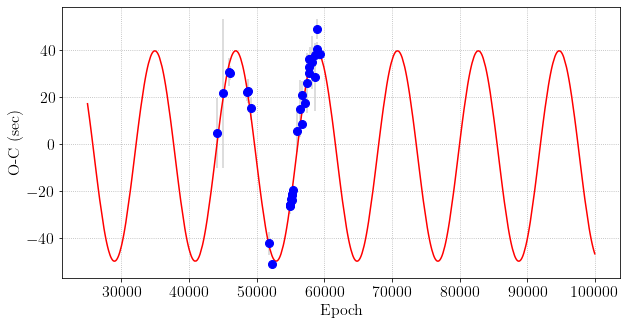

In [42]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_range, y_range, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

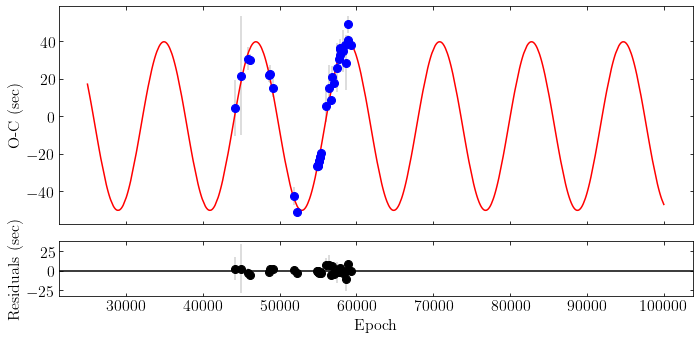

In [44]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_range, y_range, '-', color='red')

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Residual = y-s

ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

plt.show()